In [155]:
# 필요한 library들 import
import pandas as pd
import numpy as np
from google.colab import drive

In [156]:
# google drive mount 및 csv file read
drive.mount('/content/drive')
movie=pd.read_csv('/content/drive/MyDrive/movie_data/movie.csv')
rating=pd.read_csv('/content/drive/MyDrive/movie_data/rating.csv')
link=pd.read_csv('/content/drive/MyDrive/movie_data/link.csv')
tag=pd.read_csv('/content/drive/MyDrive/movie_data/tag.csv')
genome_tags=pd.read_csv('/content/drive/MyDrive/movie_data/genome_tags.csv')
genome_scores=pd.read_csv('/content/drive/MyDrive/movie_data/genome_scores.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
# 1번

In [158]:
# 원본 데이터가 너무 크기 때문에, 영화 평가를 500개 이하로 한 userid를 제거
x=rating['userId'].value_counts()>500
print(len(x[x]))
thin_rating=rating[rating['userId'].isin(x[x].index)]
movie_pivot=thin_rating.pivot_table(columns='userId',index='movieId',values='rating')

7441


In [159]:
# 원본 데이터가 너무 크기 때문에, 평가가 50개 이하인 movieid를 제거
y=thin_rating['movieId'].value_counts()>50
print(len(y[y]))
thin_rating=thin_rating[thin_rating['movieId'].isin(y[y].index)]
movie_pivot=thin_rating.pivot_table(columns='userId',index='movieId',values='rating')

9313


In [160]:
# NAN값을 0으로 변경
movie_pivot.fillna(0,inplace=True)
movie_pivot

userId,11,24,54,58,91,104,116,134,156,208,...,138270,138301,138307,138325,138382,138397,138406,138411,138437,138474
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.5,4.0,4.0,5.0,4.0,0.0,3.0,4.0,5.0,4.0,...,0.0,2.5,3.5,5.0,3.0,0.0,4.0,5.0,4.0,5.0
2,0.0,0.0,3.0,0.0,3.5,0.0,2.0,0.0,5.0,0.0,...,0.0,2.5,2.5,3.0,4.0,0.0,3.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
5,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
# 지정한 sample(item2)과 비슷한 sample을 찾기 위해 library들을 import
# item2와 비슷한 10개의 item의 index를 추출
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
movie_sparse=csr_matrix(movie_pivot)
model=NearestNeighbors(n_neighbors=10,algorithm='brute',metric='cosine')
model.fit(movie_sparse)

distances,suggestions=model.kneighbors(movie_pivot.iloc[1,:].values.reshape(1,-1))
distances,suggestions

(array([[0.        , 0.22626448, 0.23797185, 0.23983944, 0.24134662,
         0.24469272, 0.2489989 , 0.25214387, 0.2534928 , 0.25541199]]),
 array([[   1,  438,  658, 1273,  326,  334,  337, 2112, 1037,  532]]))

In [162]:
# item2와 비슷한 10개의 item의 data 확인
movie[movie['movieId'].isin(movie_pivot.index[suggestions[0]])]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
363,367,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
580,586,Home Alone (1990),Children|Comedy
767,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller
1242,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi
1528,1580,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
2486,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [163]:
# item2와 비슷한 10개의 item을 user들이 어떻게 평가했는지 확인
kneighbors=movie_pivot.iloc[suggestions[0]]
kneighbors

userId,11,24,54,58,91,104,116,134,156,208,...,138270,138301,138307,138325,138382,138397,138406,138411,138437,138474
movieId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,3.0,0.0,3.5,0.0,2.0,0.0,5.0,0.0,...,0.0,2.5,2.5,3.0,4.0,0.0,3.0,0.0,0.0,4.0
480,5.0,3.0,5.0,4.0,3.5,0.0,4.0,4.0,5.0,4.5,...,4.0,3.0,3.5,5.0,5.0,4.5,4.0,4.0,0.0,5.0
780,5.0,4.0,5.0,2.0,3.0,0.0,1.0,3.0,5.0,4.0,...,3.0,1.5,3.0,3.0,5.0,5.0,3.0,2.5,4.5,0.0
1580,5.0,5.0,4.0,4.0,3.5,3.0,2.5,4.0,5.0,1.5,...,3.0,2.0,3.0,4.5,5.0,5.0,3.5,4.0,4.5,5.0
356,5.0,5.0,5.0,4.5,4.0,0.0,4.0,3.0,5.0,1.0,...,4.0,3.5,0.0,4.5,5.0,4.5,4.0,4.0,0.0,5.0
364,4.0,0.0,0.0,0.0,4.5,0.0,4.0,0.0,4.0,3.5,...,4.0,3.0,0.0,5.0,3.0,4.0,4.0,3.5,0.0,5.0
367,4.0,4.0,4.0,5.0,2.5,0.0,1.0,3.0,4.0,3.5,...,3.0,3.0,1.5,0.0,1.0,0.0,3.5,3.5,0.0,5.0
2571,5.0,5.0,5.0,5.0,3.5,1.0,4.0,3.0,5.0,3.0,...,3.0,3.5,4.0,4.0,5.0,4.5,4.0,5.0,5.0,5.0
1270,5.0,4.0,5.0,0.0,4.0,3.0,3.5,3.0,4.0,4.0,...,4.0,3.5,3.5,5.0,4.0,4.5,4.0,4.5,4.0,0.0


In [164]:
# item2와 비슷한 10개의 item을 user24가 어떻게 평가했는지 확인
rating_24=movie_pivot.iloc[suggestions[0]][24]
rating_24

,24
movieId,
2,0.0
480,3.0
780,4.0
1580,5.0
356,5.0
364,0.0
367,4.0
2571,5.0
1270,4.0


In [167]:
# cosine similarity를 쉽게 구하기 위한 함수 생성
# weight를 계산하여 평균을 구하기 위한 함수 생성
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

# 모든 sample에서 값이 모두 0이라 평균을 구하지 못하는 경우는 0을 대신 출력
def weighted_average(matrix, array):
  sum=0
  sum_sim=0
  for i in range(1,len(array)):
    if(array.iloc[i]==0): continue
    sim=cos_sim(matrix.iloc[0], matrix.iloc[i])
    sum+=array.iloc[i]*sim
    sum_sim+=sim
  if(sum_sim==0): return 0
  return sum/sum_sim

In [168]:
# Cosine distance의 Weighted average
print('1) Cosine distance의 Weighted average')
print(np.round(weighted_average(kneighbors, rating_24),2))

1) Cosine distance의 Weighted average
4.28


In [169]:
# pearson correlation으로 weighted average를 구하기 위해 rating data 조작
pearson=kneighbors.where(kneighbors!=0).sub(kneighbors.mean(axis=1, skipna=True), axis=0)
pearson.fillna(0,inplace=True)
pearson

userId,11,24,54,58,91,104,116,134,156,208,...,138270,138301,138307,138325,138382,138397,138406,138411,138437,138474
movieId,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.000000,1.170609,0.000000,1.670609,0.000000,0.170609,0.000000,3.170609,0.000000,...,0.000000,0.670609,0.670609,1.170609,2.170609,0.000000,1.170609,0.000000,0.000000,2.170609
480,1.694933,-0.305067,1.694933,0.694933,0.194933,0.000000,0.694933,0.694933,1.694933,1.194933,...,0.694933,-0.305067,0.194933,1.694933,1.694933,1.194933,0.694933,0.694933,0.000000,1.694933
780,2.333960,1.333960,2.333960,-0.666040,0.333960,0.000000,-1.666040,0.333960,2.333960,1.333960,...,0.333960,-1.166040,0.333960,0.333960,2.333960,2.333960,0.333960,-0.166040,1.833960,0.000000
1580,1.855933,1.855933,0.855933,0.855933,0.355933,-0.144067,-0.644067,0.855933,1.855933,-1.644067,...,-0.144067,-1.144067,-0.144067,1.355933,1.855933,1.855933,0.355933,0.855933,1.355933,1.855933
356,1.451619,1.451619,1.451619,0.951619,0.451619,0.000000,0.451619,-0.548381,1.451619,-2.548381,...,0.451619,-0.048381,0.000000,0.951619,1.451619,0.951619,0.451619,0.451619,0.000000,1.451619
364,1.318506,0.000000,0.000000,0.000000,1.818506,0.000000,1.318506,0.000000,1.318506,0.818506,...,1.318506,0.318506,0.000000,2.318506,0.318506,1.318506,1.318506,0.818506,0.000000,2.318506
367,1.693186,1.693186,1.693186,2.693186,0.193186,0.000000,-1.306814,0.693186,1.693186,1.193186,...,0.693186,0.693186,-0.806814,0.000000,-1.306814,0.000000,1.193186,1.193186,0.000000,2.693186
2571,1.134928,1.134928,1.134928,1.134928,-0.365072,-2.865072,0.134928,-0.865072,1.134928,-0.865072,...,-0.865072,-0.365072,0.134928,0.134928,1.134928,0.634928,0.134928,1.134928,1.134928,1.134928
1270,1.402567,0.402567,1.402567,0.000000,0.402567,-0.597433,-0.097433,-0.597433,0.402567,0.402567,...,0.402567,-0.097433,-0.097433,1.402567,0.402567,0.902567,0.402567,0.902567,0.402567,0.000000


In [170]:
# Pearson correlation의 Weighted average
print('2) Pearson correlation의 Weighted average')
print(np.round(weighted_average(pearson, rating_24),2))

2) Pearson correlation의 Weighted average
4.23


In [171]:
# user-user CF 방식을 사용하기 위해 movie_pivot을 transpose
# user24와 비슷한 10명의 user의 index를 추출
user_pivot=movie_pivot.T
user_sparse=csr_matrix(user_pivot)
model=NearestNeighbors(n_neighbors=10,algorithm='brute',metric='cosine')
model.fit(user_sparse)

distances,suggestions=model.kneighbors(user_pivot.iloc[1,:].values.reshape(1,-1))
distances,suggestions

(array([[1.11022302e-16, 4.08984323e-01, 4.54602917e-01, 4.66776264e-01,
         4.73244630e-01, 4.78437021e-01, 4.81187378e-01, 4.81860092e-01,
         4.82423139e-01, 4.82952842e-01]]),
 array([[   1, 5219, 3008, 2439,   15, 5054, 5987, 4054, 4563, 2599]]))

In [172]:
# user24와 비슷한 10명의 user가 item들을 어떻게 평가했는지 확인
kneighbors=user_pivot.iloc[suggestions[0]]
kneighbors

movieId,1,2,3,4,5,6,7,8,9,10,...,116887,116977,117176,117590,118696,118700,118900,118997,119141,119145
userId,,,,,,,,,,,,,,,,,,,,,
24,4.0,0.0,0.0,0.0,2.0,4.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96551,5.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54745,5.0,0.0,3.0,0.0,3.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43849,3.0,3.0,3.0,0.0,3.0,4.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,4.0,3.0,3.0,0.0,3.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93580,4.0,4.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110670,4.0,0.0,0.0,0.0,2.5,4.0,0.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75079,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84269,5.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
# user24와 비슷한 10명의 user가 item2를 어떻게 평가했는지 확인
rating_24=user_pivot.iloc[suggestions[0]][2]
rating_24

,2
userId,
24,0.0
96551,0.0
54745,0.0
43849,3.0
298,3.0
93580,4.0
110670,0.0
75079,3.0
84269,0.0


In [174]:
# pearson correlation으로 weighted average를 구하기 위해 rating data 조작
pearson=kneighbors.where(kneighbors!=0).sub(kneighbors.mean(axis=1, skipna=True), axis=0)
pearson.fillna(0,inplace=True)
pearson

movieId,1,2,3,4,5,6,7,8,9,10,...,116887,116977,117176,117590,118696,118700,118900,118997,119141,119145
userId,,,,,,,,,,,,,,,,,,,,,
24,3.818963,0.000000,0.000000,0.0,1.818963,3.818963,2.818963,0.0,0.000000,2.818963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96551,4.774079,0.000000,0.000000,0.0,0.000000,4.774079,3.774079,0.0,0.000000,4.774079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54745,4.784280,0.000000,2.784280,0.0,2.784280,4.784280,0.000000,0.0,0.000000,3.784280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43849,2.734994,2.734994,2.734994,0.0,2.734994,3.734994,0.000000,0.0,0.734994,2.734994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,3.656824,2.656824,2.656824,0.0,2.656824,4.656824,0.000000,0.0,0.000000,3.656824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93580,3.780414,3.780414,0.000000,0.0,3.780414,2.780414,0.000000,0.0,0.000000,2.780414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110670,3.811339,0.000000,0.000000,0.0,2.311339,3.811339,0.000000,0.0,0.000000,2.311339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75079,3.704284,2.704284,0.000000,0.0,0.000000,4.704284,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84269,4.684742,0.000000,3.684742,0.0,0.000000,4.684742,0.000000,0.0,0.000000,2.684742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
# User-User CF에서 Pearson correlation 의 Weighted average
print('3) User-User CF에서 Pearson correlation 의 Weighted average')
print(np.round(weighted_average(pearson, rating_24),2))

3) User-User CF에서 Pearson correlation 의 Weighted average
3.25


In [ ]:
# 2번

In [176]:
# kneighbors가 모두 평가를 하지 않은 데이터는 무시하고 rmse를 계산
def rmse(test_set, pred_set):
  return np.sqrt(np.mean(np.square(test_set.replace(0,np.nan)-pred_set.replace(0,np.nan))))

In [177]:
# movie_pivot의 왼쪽위를 기점으로 가로로 10개, 세로로 100개의 데이터를 백업해 test set으로 두고
# 해당 영역의 데이터를 0으로 만든 train set을 생성
test_data_set=movie_pivot.iloc[0:100,0:10]
test_data_set.reset_index(drop=True, inplace=True)
test_data_set.columns=[i for i in range(10)]
train_data_set=movie_pivot.copy()
train_data_set.iloc[0:100,0:10]=0
train_data_set

userId,11,24,54,58,91,104,116,134,156,208,...,138270,138301,138307,138325,138382,138397,138406,138411,138437,138474
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,3.5,5.0,3.0,0.0,4.0,5.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,2.5,3.0,4.0,0.0,3.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
# 지정된 item과 비슷한 300개의 item을 찾아 weight없이 average를 구하는 것을
# 임의로 값을 지워둔 (10,100) 데이터에 대해서 실행
movie_sparse=csr_matrix(train_data_set)
model=NearestNeighbors(n_neighbors=300,algorithm='brute',metric='cosine')
model.fit(movie_sparse)

df=pd.DataFrame()
for i in range(10):
  distances,suggestions=model.kneighbors(train_data_set.iloc[i,:].values.reshape(1,-1))
  kneighbors=train_data_set.iloc[suggestions[0]]
  temp=[]
  for j in range(100):
    # test data set에 없는 데이터는 RMSE 계산에 사용이 안되니, 예측도 하지 않도록 함
    if(test_data_set.iloc[j,i]==0): temp.append(np.nan); continue
    rating=train_data_set.iloc[suggestions[0]][train_data_set.iloc[suggestions[0]].columns[j]]
    temp.append(np.mean(rating))
  df[i]=temp
df

,0,1,2,3,4,5,6,7,8,9
0,1.738333,2.015000,1.415000,0.6,1.500000,NaN,1.296667,0.888333,1.138333,1.786667
1,NaN,NaN,1.896667,NaN,1.703333,NaN,1.760000,NaN,1.333333,NaN
2,NaN,NaN,NaN,NaN,2.306667,NaN,2.510000,NaN,2.113333,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.521667,NaN
4,NaN,2.835000,2.495000,NaN,NaN,NaN,NaN,NaN,1.330000,NaN
...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,1.696667,NaN,NaN,1.633333,NaN,1.993333,0.836667,1.160000,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615000,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# item기반, cosine distance, average로 했을 때의 RMSE
print('item기반, cosine distance, average로 했을 때의 RMSE')
np.round(rmse(test_data_set,df),4)

item기반, cosine distance, average로 했을 때의 RMSE


2.1366

In [180]:
# item기반, pearson correlation, average로 했을 때의 RMSE
print('item기반, pearson correlation, average로 했을 때의 RMSE')
np.round(rmse(test_data_set,df),4)

item기반, pearson correlation, average로 했을 때의 RMSE


2.1366

In [181]:
# 지정된 item과 비슷한 300개의 item을 찾아 cosine distance를 사용한 weighted average를 구하는 것을
# 임의로 값을 지워둔 (10,100) 데이터에 대해서 실행
movie_sparse=csr_matrix(train_data_set)
model=NearestNeighbors(n_neighbors=300,algorithm='brute',metric='cosine')
model.fit(movie_sparse)

df=pd.DataFrame()
for i in range(10):
  distances,suggestions=model.kneighbors(train_data_set.iloc[i,:].values.reshape(1,-1))
  kneighbors=train_data_set.iloc[suggestions[0]]
  temp=[]
  for j in range(100):
    # test data set에 없는 데이터는 RMSE 계산에 사용이 안되니, 예측도 하지 않도록 함
    if(test_data_set.iloc[j,i]==0): temp.append(np.nan); continue
    rating=train_data_set.iloc[suggestions[0]][train_data_set.iloc[suggestions[0]].columns[j]]
    temp.append(weighted_average(kneighbors, rating))
  df[i]=temp
df

,0,1,2,3,4,5,6,7,8,9
0,4.431805,4.455053,4.339213,4.497842,4.374655,NaN,4.425187,4.264506,4.259078,4.405241
1,NaN,NaN,3.749815,NaN,3.632727,NaN,3.597211,NaN,3.631026,NaN
2,NaN,NaN,NaN,NaN,3.762187,NaN,3.823731,NaN,3.633595,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.796383,NaN
4,NaN,3.465929,3.346323,NaN,NaN,NaN,NaN,NaN,3.104835,NaN
...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,3.294631,NaN,NaN,3.016167,NaN,3.322347,2.612013,2.548652,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.451738,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# item기반, cosine distance, weighted average로 했을 때의 RMSE
print('item기반, cosine distance, weighted average로 했을 때의 RMSE')
np.round(rmse(test_data_set,df),4)

item기반, cosine distance, weighted average로 했을 때의 RMSE


1.1985

In [183]:
# 지정된 item과 비슷한 300개의 item을 찾아 pearson correlation을 사용한 weighted average를 구하는 것을
# 임의로 값을 지워둔 (10,100) 데이터에 대해서 실행
movie_sparse=csr_matrix(train_data_set)
model=NearestNeighbors(n_neighbors=300,algorithm='brute',metric='cosine')
model.fit(movie_sparse)

df=pd.DataFrame()
for i in range(10):
  distances,suggestions=model.kneighbors(train_data_set.iloc[i,:].values.reshape(1,-1))
  kneighbors=train_data_set.iloc[suggestions[0]]
  temp=[]
  for j in range(100):
    # test data set에 없는 데이터는 RMSE 계산에 사용이 안되니, 예측도 하지 않도록 함
    if(test_data_set.iloc[j,i]==0): temp.append(np.nan); continue
    rating=train_data_set.iloc[suggestions[0]][train_data_set.iloc[suggestions[0]].columns[j]]
    pearson=kneighbors.where(kneighbors!=0).sub(kneighbors.mean(axis=1, skipna=True), axis=0)
    pearson.fillna(0,inplace=True)
    temp.append(weighted_average(pearson, rating))
  df[i]=temp
df

,0,1,2,3,4,5,6,7,8,9
0,4.432092,4.453531,4.306167,4.443139,4.355893,NaN,4.406463,4.224872,4.212866,4.383875
1,NaN,NaN,3.683760,NaN,3.550278,NaN,3.512366,NaN,3.562616,NaN
2,NaN,NaN,NaN,NaN,3.702028,NaN,3.770411,NaN,3.591279,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.767999,NaN
4,NaN,3.442970,3.316600,NaN,NaN,NaN,NaN,NaN,3.071170,NaN
...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,3.199904,NaN,NaN,2.925723,NaN,3.282453,2.534220,2.456429,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.421751,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
# item기반, pearson correlation, weighted average로 했을 때의 RMSE
print('item기반, pearson correlation, weighted average로 했을 때의 RMSE')
np.round(rmse(test_data_set,df),4)

item기반, pearson correlation, weighted average로 했을 때의 RMSE


1.2025

In [185]:
# movie_pivot의 transpose인 user_pivot의 왼쪽위를 기점으로 가로로 100개, 세로로 10개의 데이터를 백업해 test set으로 두고
# 해당 영역의 데이터를 0으로 만든 train set을 생성
user_pivot=movie_pivot.T
test_data_set=user_pivot.iloc[0:10,0:100]
test_data_set.reset_index(drop=True, inplace=True)
test_data_set.columns=[i for i in range(100)]
train_data_set=user_pivot.copy()
train_data_set.iloc[0:10,0:100]=0
train_data_set

movieId,1,2,3,4,5,6,7,8,9,10,...,116887,116977,117176,117590,118696,118700,118900,118997,119141,119145
userId,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138397,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138406,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138411,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
# 지정된 user와 비슷한 300명의 user를 찾아 weight없이 average를 구하는 것을
# 임의로 값을 지워둔 (100,10) 데이터에 대해서 실행
user_sparse=csr_matrix(train_data_set)
model=NearestNeighbors(n_neighbors=300,algorithm='brute',metric='cosine')
model.fit(user_sparse)

df=pd.DataFrame()
for i in range(100):
  distances,suggestions=model.kneighbors(train_data_set.iloc[i,:].values.reshape(1,-1))
  kneighbors=train_data_set.iloc[suggestions[0]]
  temp=[]
  for j in range(10):
    # test data set에 없는 데이터는 RMSE 계산에 사용이 안되니, 예측도 하지 않도록 함
    if(test_data_set.iloc[j,i]==0): temp.append(np.nan); continue
    rating=train_data_set.iloc[suggestions[0]][train_data_set.iloc[suggestions[0]].columns[j]]
    temp.append(np.mean(rating))
  df[i]=temp
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.555000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.823333,NaN,NaN,NaN,2.425,1.031667,2.601667,NaN,NaN,1.225000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.403333,NaN,NaN,NaN
2,0.651667,1.541667,NaN,NaN,1.455,0.583333,NaN,NaN,NaN,0.706667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.010000,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.521667,1.173333,1.066667,NaN,NaN,NaN,1.223333,NaN,NaN,0.580000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.616667,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.451667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.423333,1.261667,1.416667,NaN,NaN,1.083333,NaN,1.2,2.081667,1.258333,...,NaN,NaN,NaN,NaN,NaN,NaN,1.380000,NaN,NaN,0.485
7,0.036667,NaN,NaN,NaN,NaN,0.168333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.016667,NaN,NaN,0.138333,NaN,NaN,NaN
8,0.240000,0.543333,0.695000,0.3,0.175,0.120000,0.686667,NaN,0.768333,0.186667,...,NaN,NaN,NaN,NaN,NaN,NaN,0.211667,0.206667,NaN,NaN
9,2.738333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# user기반, cosine distance, average로 했을 때의 RMSE
print('user기반, cosine distance, average로 했을 때의 RMSE')
np.round(rmse(test_data_set,df),4)

user기반, cosine distance, average로 했을 때의 RMSE


2.5816

In [188]:
# user기반, pearson correlation, average로 했을 때의 RMSE
print('user기반, pearson correlation, average로 했을 때의 RMSE')
np.round(rmse(test_data_set,df),4)

user기반, pearson correlation, average로 했을 때의 RMSE


2.5816

In [189]:
# 지정된 user와 비슷한 300명의 user를 찾아 cosine distance를 사용한 weighted average를 구하는 것을
# 임의로 값을 지워둔 (100,10) 데이터에 대해서 실행
user_sparse=csr_matrix(train_data_set)
model=NearestNeighbors(n_neighbors=300,algorithm='brute',metric='cosine')
model.fit(user_sparse)

df=pd.DataFrame()
for i in range(100):
  distances,suggestions=model.kneighbors(train_data_set.iloc[i,:].values.reshape(1,-1))
  kneighbors=train_data_set.iloc[suggestions[0]]
  temp=[]
  for j in range(10):
    # test data set에 없는 데이터는 RMSE 계산에 사용이 안되니, 예측도 하지 않도록 함
    if(test_data_set.iloc[j,i]==0): temp.append(np.nan); continue
    rating=train_data_set.iloc[suggestions[0]][train_data_set.iloc[suggestions[0]].columns[j]]
    temp.append(weighted_average(kneighbors, rating))
  df[i]=temp
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.794584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.065827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.197379,NaN,NaN,NaN,2.839967,2.712464,2.979737,NaN,NaN,2.702478,...,NaN,NaN,NaN,NaN,NaN,NaN,2.752699,NaN,NaN,NaN
2,2.962404,3.105872,NaN,NaN,2.675411,2.227820,NaN,NaN,NaN,2.382774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.000000,NaN,NaN,NaN,NaN,2.576126,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.693314,2.860034,2.829141,NaN,NaN,NaN,2.723881,NaN,NaN,2.376771,...,NaN,NaN,NaN,NaN,NaN,NaN,2.452981,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.952198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.940890,3.181269,3.176274,NaN,NaN,2.748342,NaN,2.879148,3.158590,2.776059,...,NaN,NaN,NaN,NaN,NaN,NaN,2.939319,NaN,NaN,2.644513
7,2.748276,NaN,NaN,NaN,NaN,2.286594,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.668915,NaN,NaN,2.437570,NaN,NaN,NaN
8,2.578516,2.503386,2.569598,2.052605,2.185728,2.092216,2.517804,NaN,2.590968,2.331371,...,NaN,NaN,NaN,NaN,NaN,NaN,2.186545,2.38737,NaN,NaN
9,3.463878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
# user기반, cosine distance, weighted average로 했을 때의 RMSE
print('user기반, cosine distance, weighted average로 했을 때의 RMSE')
np.round(rmse(test_data_set,df),4)

user기반, cosine distance, weighted average로 했을 때의 RMSE


1.3676

In [191]:
# 지정된 user와 비슷한 300명의 user를 찾아 pearson correlation을 사용한 weighted average를 구하는 것을
# 임의로 값을 지워둔 (100,10) 데이터에 대해서 실행
user_sparse=csr_matrix(train_data_set)
model=NearestNeighbors(n_neighbors=300,algorithm='brute',metric='cosine')
model.fit(user_sparse)

df=pd.DataFrame()
for i in range(100):
  distances,suggestions=model.kneighbors(train_data_set.iloc[i,:].values.reshape(1,-1))
  kneighbors=train_data_set.iloc[suggestions[0]]
  temp=[]
  for j in range(10):
    # test data set에 없는 데이터는 RMSE 계산에 사용이 안되니, 예측도 하지 않도록 함
    if(test_data_set.iloc[j,i]==0): temp.append(np.nan); continue
    rating=train_data_set.iloc[suggestions[0]][train_data_set.iloc[suggestions[0]].columns[j]]
    pearson=kneighbors.where(kneighbors!=0).sub(kneighbors.mean(axis=1, skipna=True), axis=0)
    pearson.fillna(0,inplace=True)
    temp.append(weighted_average(pearson, rating))
  df[i]=temp
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.795206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.067649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.197844,NaN,NaN,NaN,2.840598,2.713162,2.979749,NaN,NaN,2.703933,...,NaN,NaN,NaN,NaN,NaN,NaN,2.752751,NaN,NaN,NaN
2,2.963209,3.106134,NaN,NaN,2.676120,2.228312,NaN,NaN,NaN,2.385001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.000000,NaN,NaN,NaN,NaN,2.575722,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.694224,2.860519,2.829861,NaN,NaN,NaN,2.723985,NaN,NaN,2.378018,...,NaN,NaN,NaN,NaN,NaN,NaN,2.453126,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.952988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.941609,3.181531,3.177244,NaN,NaN,2.748796,NaN,2.879641,3.161826,2.775791,...,NaN,NaN,NaN,NaN,NaN,NaN,2.938940,NaN,NaN,2.647406
7,2.748031,NaN,NaN,NaN,NaN,2.288346,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.670524,NaN,NaN,2.437935,NaN,NaN,NaN
8,2.578995,2.503768,2.571060,2.053094,2.185617,2.092961,2.518015,NaN,2.595320,2.331202,...,NaN,NaN,NaN,NaN,NaN,NaN,2.186699,2.390583,NaN,NaN
9,3.464121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# user기반, pearson correlation, weighted average로 했을 때의 RMSE
print('user기반, pearson correlation, weighted average로 했을 때의 RMSE')
np.round(rmse(test_data_set,df),4)

user기반, pearson correlation, weighted average로 했을 때의 RMSE


1.3667

In [193]:
# RMSE 데이터를 입력한 dataframe을 생성
result=pd.DataFrame()
result['CF']=['Item','Item','Item','Item','User','User','User','User']
result['Distance']=['Cosine', 'Cosine', 'Pearson', 'Pearson', 'Cosine', 'Cosine', 'Pearson', 'Pearson']
result['Average']=['Avg', 'Weighted Avg', 'Avg', 'Weighted Avg', 'Avg', 'Weighted Avg', 'Avg', 'Weighted Avg']
result['RMSE']=[2.1366, 1.1985, 2.1366, 1.2025, 2.5816, 1.3676, 2.5816, 1.3667]
result

,CF,Distance,Average,RMSE
0,Item,Cosine,Avg,2.1366
1,Item,Cosine,Weighted Avg,1.1985
2,Item,Pearson,Avg,2.1366
3,Item,Pearson,Weighted Avg,1.2025
4,User,Cosine,Avg,2.5816
5,User,Cosine,Weighted Avg,1.3676
6,User,Pearson,Avg,2.5816
7,User,Pearson,Weighted Avg,1.3667


Text(0.5, 0.98, 'Mean of RMSE by Multiple Methods')

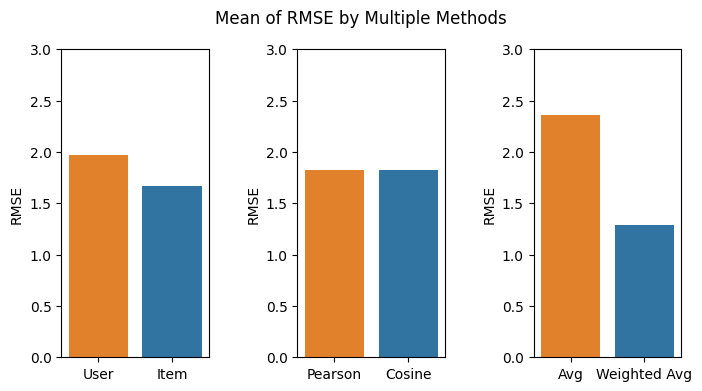

In [194]:
# 각 방법에 의한 RMSE를 비교하기 위해 방법별 bar plot을 생성
import seaborn as sns
import matplotlib.pyplot as plt

mean_rmse_by_cf = result['RMSE'].groupby(result['CF']).mean().reset_index()
order_cf=mean_rmse_by_cf.sort_values('RMSE',ascending=False)['CF']

mean_rmse_by_distance = result['RMSE'].groupby(result['Distance']).mean().reset_index()
order_distance=mean_rmse_by_distance.sort_values('RMSE',ascending=False)['Distance']

mean_rmse_by_average = result['RMSE'].groupby(result['Average']).mean().reset_index()
order_average=mean_rmse_by_average.sort_values('RMSE',ascending=False)['Average']

fig,ax=plt.subplots(1,3, figsize=(8,4))
plt.subplots_adjust(wspace=0.6)

sns.barplot(data=mean_rmse_by_cf, x='CF', y='RMSE', hue='CF',
            order=order_cf, hue_order=np.flip(order_cf), ax=ax[0])
sns.barplot(data=mean_rmse_by_distance, x='Distance', y='RMSE', hue='Distance',
            order=order_distance, hue_order=np.flip(order_distance), ax=ax[1])
sns.barplot(data=mean_rmse_by_average, x='Average', y='RMSE', hue='Average',
            order=order_average, hue_order=np.flip(order_average), ax=ax[2])
for a in ax:
  a.set_xlabel('')
  a.set_ylim(0,3)
plt.suptitle('Mean of RMSE by Multiple Methods')